# Projet Th√©orie des langages

## Introduction
Le projet a lieu dans le cadre du cours de th√©ories des langages r√©alis√© au Semestre 2 de la deuix√®me ann√©e de Licence Sciences du Num√©rique. 
Il a √©t√© r√©alis√© par Candice Giami et Cl√©ment Szewczyk. 

L'objectif du projet est d'impl√©menter une bibliot√®que de fonction sur les automates en **python**. 

Les √©tapes du projet : 
- mod√©lisation d‚Äôun automate.
- de charger la description d‚Äôun automate sous forme d‚Äôun fichier texte (texte brut, json, xml‚Ä¶) dont vous d√©finirez
le format
- de sauvegarder la description d‚Äôun automate sous forme d‚Äôun fichier texte dont le format respecte celui en lecture
- d‚Äôafficher l‚Äôautomate √† l‚Äô√©cran ou de g√©n√©rer un fichier image.
- R√©aliser des op√©rations √©l√©mentaires sur les automates (union, concat√©nation et r√©p√©tition)
- Synchroniser un automate (suppression des ùúñ-transitions) **(BONUS)**
- Construire un automate √† partir d‚Äôune expression r√©guli√®re **(BONUS)**
- Compl√©ter/D√©terminiser/Minimiser un automate
- Reconnaitre une adresse mail √† l‚Äôaide d‚Äôun automate

Les √©tapes sont d√©coup√© en 4 parties :
1. Mod√©lisation d'un automate
2. Op√©rations sur les automates
3. Expressions r√©guli√®res verd Automates (Bonus)
4. Finalisation

## Rapport du projet

Le rapport est r√©alis√© avec Jupiter Notebook. Il est disponible dans le dossier `rapport`.
Pour avoir l'affichage des automates au sein du rapport, nous avons utilis√© la biblioth√®que `IPython` en particulier la fonction `display` et la fonction `Image`. 

```python

from IPython.display import display, Image

# Pour afficher un automate (exemple)
display(Image(filename='automate.png'))

```

Si nous √©x√©cutons le code ci-dessus dans un notebook, nous aurons l'affichage de l'automate. Par contre, si nous ex√©cutons le code dans un fichier python, nous n'aurons pas l'affichage de l'automate mais la ligne suivante dans la console : 

```bash
<IPython.core.display.Image object>
```

## Les diff√©rents fichiers/dossiers

- `automate.py` : contient la classe `Automate` qui permet de mod√©liser un automate. Cette contient les m√©thode permettant de travailler sur un automate. 
- `etat.py` : contient la classe `Etat` qui permet de mod√©liser un √©tat.
- `transition.py` : contient la classe `Transition` qui permet de mod√©liser une transition.
- Le dossier `partie1` contient les fichiers suivants :
    - `modelisation.py` : contient les pour la mod√©lisation d'un automate. Mais aussi l'importation et l'exportation d'un automate.
- Le dossier `partie2` contient les fichiers suivants :
    - Dossier `Union` : contient les fichiers de test pour l'union de deux automates.
    - Dossier `Concatenation` : contient les fichiers de test pour la concat√©nation de deux automates.
    - Dossier `Repetition` : contient les fichiers de test pour la r√©p√©tition d'un automate.
## Les diff√©rentes classes

### Classe `Etat`

La classe `Etat` permet de mod√©liser un √©tat. Elle a les attributs suivants :
- `nom` : un nom d'√©tat
- `initial` : un bool√©en indiquant si l'√©tat est initial
- `terminal` : un bool√©en indiquant si l'√©tat est terminal

### Classe `Transition`

La classe `Transition` permet de mod√©liser une transition. Elle a les attributs suivants :
- `depart` : l'√©tat de d√©part de la transition
- `symbole` : le ou les symbole(s) de la transition
- `arrivee` : l'√©tat d'arriv√©e de la transition

### Classe `Automate`

La classe `Automate` permet de mod√©liser un automate. Elle a les attributs suivants :
-  `etats` : une liste d'√©tats (instances de la classe `Etat`)
- `alphabet` : un ensemble de symboles
- `transitions` : une liste de transitions (instances de la classe `Transition`)

## Partie 1 : Mod√©lisation d'un automate

### 1.1. Mod√©lisation d'un automate

Pour mod√©liser un automate, nous utilisons la classe `Automate`, la classe `Etat` et la classe `Transition` (d√©j√† pr√©sent√© ci-dessus).

1. Initialisation de l'automate : on cr√©e une instance de la classe `Automate` et on y ajoute l'alphabet de l'automate lors de l'initialisation. 
```python
alphabet={'a', 'b', 'c'}	
automate = Automate(alphabet)
```
2. Ajout d'√©tats : on cr√©e des instances de la classe `Etat` et on les ajoute √† l'automate. Les param√®tres de la classe `Etat` sont le nom de l'√©tat, un bool√©en indiquant si l'√©tat est terminal et un bool√©en indiquant si l'√©tat est initial. 
```python
automate.ajouter_etat(Etat('q0', True, False))
```	
3. Ajout de transitions : on cr√©e des instances de la classe `Transition` et on les ajoute √† l'automate. Les param√®tres de la classe `Transition` sont l'√©tat de d√©part, le ou les symbole(s) de la transition et l'√©tat d'arriv√©e. 
```python
automate.ajouter_transition(Transition('q0', 'a', 'q1'))
```

Notre automate est maintenant cr√©√©. Mais nous ne pouvons pas encore l'afficher. 

### 1.2. Affichage de l'automate

Pour obtenir une image, nous allons convertir notre automate en dot et ensuite en png. Nous utilisons la biblioth√®que `graphviz`. 

```python
# Convertir l'automate en dot
automate.to_dot()

# Convertir le fichier dot en png
automate.to_png("automate")
```
La m√©thode `to_dot` retourne une cha√Æne de caract√®res repr√©sentant l'automate au format dot. La m√©thode `to_png` cr√©e un fichier png repr√©sentant l'automate.

On n'est pas oblig√© de passer par la m√©thode `to_dot` pour afficher l'automate. On peut directement passer par la m√©thode `to_png` qui va appeler la m√©thode `to_dot` pour nous. 

Pour afficher l'automate, nous utilisons la fonction `display` de la biblioth√®que `IPython`. 

Pour voir le r√©sultat, il suffit d'ouvir le fichier `automate.png` qui a √©t√© cr√©√©.


### 1.3 Importation / Export d'un automate

- `export` : est une fonction qui permet d'exporter un Automate et prend en param√®tre l'automate √† exporter (self) et le nom du fichier. 
La fonction cr√©e un fichier avec le nom donn√© si celui n'existe pas. Sinon elle modifie le fichier. 
La structure du fichier d'exportation est la suivante : 
    - Ligne 1 : Alphabet de l'automate
    - Ligne 2 : √âtats de l'automate
    - Ligne 3 : √âtats initiaux 
    - Ligne 4 : √âtats terminaux
    - A partir de la ligne 5, nous retrouvons les transition avec la structure suivante : `√©tat d√©part` `symbols` `√©tat fin`

- `importation` : est une fonction qui permet d'importer un automate depuis un fichier texte et prend en param√®tre le nom du fichier texte. 
La fonction rempli d'abord les variables qui vont nous permettre de cr√©er l'automate. Pour cela elle suit la logique expliqu√© pr√©c√©dement. 
Une fois cela effectu√©, elle cr√©e un nouvel automate qu'elle retourne. 

La paricularit√© de la fonction 'importation' est qu'elle est d√©fini en dehors de la classe `Automate`. 

**Exemple d'utilisation**

```python
# Exporter un automate
automate.export("automate.txt")

# Importer un automate
automate = importation("automate.txt")
```


### 1.4 Exemple d'automate

Voici un exemple de mod√©lisation d'un automate. Le code de cette exemple est disponible dans le fichier `partie1/modelisation.py`. 


Automate 1

Alphabet: ['a', 'b', 'c', 'd']
Etats: 1, 2, 3, 4
Etats terminaux: 3
Etat initial: 1
Transitions: 
1 --['a', 'b']--> 2
2 --b--> 3
3 --c--> 4
4 --d--> 1

Automate 1 au format dot

digraph {
	rankdir=LR
	init [shape=point]
	init -> 1
	1
	2
	3 [shape=doublecircle]
	3
	4
	1 -> 2 [label="a,b"]
	2 -> 3 [label=b]
	3 -> 4 [label=c]
	4 -> 1 [label=d]
}

Automate 1 au format png



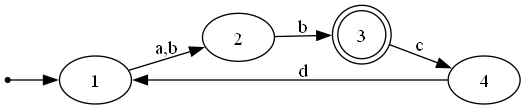

Automate 1 export√© dans modelisation1.txt

 


Automate 2 import√© depuis modelisation1.txt

initiaux {'1'}
terminaux {'3'}
Automate 2

Alphabet: {'a', 'b', 'c', 'd'}
Etats: 4, 1, 3, 2
Etats terminaux: 3
Etat initial: 1
Transitions: 
1 --['a', 'b']--> 2
2 --['b']--> 3
3 --['c']--> 4
4 --['d']--> 1

Automate 2 au format png



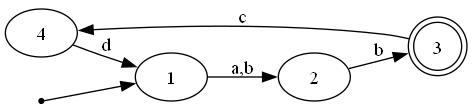

In [5]:
%run ../partie1/modelisation.py

## Partie 2 : Op√©rations sur les automates

### 2.1. Union de deux automates

#### 2.1.1 M√©thode 'union'
La m√©thode `union` du fichier `automate.py` permet de r√©aliser l'union de deux automates.

**Alphabet** : L'alphabet de l'automate r√©sultant est l'union des alphabets des deux automates plus un symbole suppl√©mentaire, `une chaine vide`. Celui-ci permettra de r√©aliser des transitions vide.

**√âtats** : 
- Dans un premier temps, nous proc√©dons √† un renommage des √©tats des deux automates pour √©viter les conflits.
- Ensuite, nous ajoutons un nouvel √©tat initial et un √©tat pour distribuer l'√©tat initial aux anciens √©tats initiaux des deux automates.

**Transitions et Etat Terminaux** :
- Nous ajoutons les transitions et les √©tats terminaux des deux automates √† l'automate r√©sultant.
- Ajout de la transition vide entre le nouvel √©tat initial et le nouvel √©tat de distribution de l'√©tat initial.
- Ajout de la transition vide entre les anciens √©tat initiaux des deux automates et l'√©tat temporaire

**Probl√®me** : Nous avons un probl√®me sur le fait que l'on pouvait ajouter une seul destination via notre m√©thode `ajouter_transition`. Or avec notre m√©thode `union` nous avons besoin de pouvoir ajouter plusieurs destinations. Lors de l'√©x√©cution de la m√©thode `union` l'ajout se r√©alise correctement mais en √©crasant l'ancien ajout. 

Pour cela, nous avons modifi√© la m√©thode `ajouter_transition` pour qu'elle puisse ajouter plusieurs destinations. 
Maintenant, nous avons le r√©sultat attendu.
#### 2.1.2 Exemple d'utilisation

### 2.2 Concat√©nation de deux automates. 

#### 2.2.1

La m√©thode `concatenation` du fichier `automate.py` permet de r√©aliser la concat√©nation de deux automates. 

**Alphabet** : L'alphabet de l'automate r√©sultant est l'union des alphabets des deux automates plus un symbole suppl√©mentaire, `une chaine vide`. Celui-ci permettra de r√©aliser des transitions vide.

**Etats** :
- Dans un premier temps, nous proc√©dons √† un renommage des √©tats des deux automates pour √©viter les conflits.
- Ensuite, nous ajoutons un nouvel √©tat initial et un √©tat pour distribuer l'√©tat initial aux anciens √©tats initiaux des deux automates.

**Transitions et Etat Terminaux** :
- Nous ajoutons les transitions et les √©tats terminaux des deux automates √† l'automate de la concat√©nation.
- Ajout de la transition vide entre les anciens √©tat terminaux de l'automate 1 et l'√©tat temporaire. 
- Ajout de la transition vide entre l'√©tat temporaire et les anciens √©tats initiaux de l'automate 2.

#### 2.2.2 Exemple d'utilisation

### 2.3 R√©p√©tion d'un automate 

#### 2.3.1 M√©thode `repetition`

#### 2.3.2 Exemple d'utilisation

## Partie 4 : Finalisation

### 4.1 Compl√©ter un automate

### 4.2 D√©terminisation d'un automate

#### 4.2.1 M√©thode `est_d√©terministe`

Cette m√©thode permet de savoir si un automate est d√©terministe. Si oui, elle retourne `True`, sinon, elle retourne `False`

**Exemple d'utilisation**

Prenons l'exemple de l'automate suivant : 


Nous pouvons voir que l'automate 1 n'est pas d√©terministe car l'√©tat 0 peut aller vers l'√©tat 1 ou lui m√™me avec le symbole `b`.

Contrairement √† l'automate 2 qui est d√©terministe. 

#### 4.2.2 M√©thode `determinisation`

**Algorithme de d√©terminisation** :
1. Cr√©ation d'un automate vide
2. Cr√©ation de l'√©tat initial de l'automate d√©terministe
    - L'√©tat initial de l'automate d√©terministe est l'ensemble des √©tats atteignables √† partir de l'√©tat initial de l'automate non d√©terministe
3. Cr√©ation de la table de transition

    - structure de la table de transition : 
        - cl√© : √©tat de l'automate non d√©terministe
        - n colonnes : symboles de l'alphabet
    - 1√®re ligne : √©tat initial de l'automate non d√©terministe
    - 2eme et n lignes : √©tats de l'automate non d√©terministe provenant de la table de transition

4. Interpr√©tation de la table de transition

    - Pour chaque √©tat de la table de transition, on cr√©e un √©tat dans l'automate d√©terministe

5. Cr√©ation des √©tats terminaux de l'automate d√©terministe

    - Un √©tat de l'automate d√©terministe est terminal si au moins un des √©tats de l'automate non d√©terministe qu'il repr√©sente est terminal

## Les probl√®mes rencontr√©s

### Probl√®me 1 : Le choix de la structure de donn√©es

Nous avons commenc√© le projet en utilisant la structure de donn√©es suivante ; 
- Une classe `Automate` qui contenait les √©l√©ments suivant 
    - une liste pour l'alphabet
    - un set pour les √©tats
    - un set pour les √©tats initiaux
    - un set pour les √©tats terminaux
    - un dictionnaire pour les transitions

Au d√©but (partie 1 et 2), nous avons r√©ussi √† nous en sortir, mais nous avons rencontr√© des probl√®mes lors de la d√©terminisation de l'automate. Apr√®s avoir cherch√© des solutions pour r√©soudre le probl√®me. N'en trouvant pas, nous avons d√©cid√© de changer de structure de donn√©es en utilisant trois classes diff√©rentes : `Automate`, `Etat` et `Transition`.
